# Public data APIs

How do we access amazing data? The answer is data APIs.

## What is an API?

API stands for Application Programming Interface and it serves as a data transmitter between two different pieces of software. The term has historically been used to describe any sort of connectivity interface to an application. 

Today, the term API typically takes an additional meaning:
- Modern APIs adhere to certain standards (typically HTTP and REST) 
- They are treated like products
- They often adhere to high security standards

We usually have two interfaces for Software:

- UI (User Interface) - humans talking to computers
- API - computers talking to computers


## Types of APIs

### By availability

- **Open and public APIs** are available to everyone, allowing anyone to access or perform operations on public datasets.

- **Internal APIs** are used in-house by developers.

- **Partner APIs** are a form of semi-open API where access is granted under certain conditions determined by the publisher.

### By structure

APIs also differ in architecture. The most popular API architectures are:
- **JSON-RPC and XML-RPC**
RPC stands for Remote Procedure Call and is a protocol for data transmission in JSON or XML format. 
- **REST** stands for representational state transfer. It's a software architectural style that provides a set of recommendations for web development. 
- **SOAP** stands for Simple Object Access Protocol and is a definition of API protocols and standards.
- **GraphQL** Graph Query Language, used for accessing highly interconnected data (e.g. GitHub)

## Accessing a Public Data API with Python

In order to retrieve data from an API we will combine the ``request`` library and the ``JSON`` library.

When we want to receive data from the API we first make a *request*.

To do so in python, we need to install the ``requests`` library.

In [1]:
import requests

### Example: NASA's APOD API

Let's test out one of [NASA's open APIs](https://api.nasa.gov/):

In [2]:
demo_key = "DEMO_KEY"

url = "https://api.nasa.gov/planetary/apod"

response = requests.get(url, params={"api_key": demo_key, "date": "2023-10-16"})
response

200 https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY&date=2023-10-16
headers:   Access-Control-Allow-Origin: *
  Access-Control-Expose-Headers: X-RateLimit-Limit, X-RateLimit-Remaining
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Type: application/json
  Date: Wed, 25 Oct 2023 09:47:42 GMT
  Strict-Transport-Security: max-age=31536000; includeSubDomains; preload
  Transfer-Encoding: chunked
  Vary: Accept-Encoding
  Via: http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])
  X-Api-Umbrella-Request-Id: cbcotovkqsd1bir13org
  X-Cache: MISS
  X-Content-Type-Options: nosniff
  X-Frame-Options: DENY
  X-Ratelimit-Limit: 40
  X-Ratelimit-Remaining: 39
  X-Vcap-Request-Id: 076d6fe2-3d57-441b-6a5d-cf6737433b3c
  X-XSS-Protection: 1; mode=block

body (application/json):
{'copyright': '\nJerry Zhang (left), \nBaolong Chen (photographer) & Amber Zhang (right)\n',
 'date': '2023-10-16',
 'explanation': 'She knew everything but the question. She was well aware that there

In [3]:
import json

data = response.json()
from IPython.display import HTML, Image, display

display(HTML(response.json()["explanation"]))
Image(url=data["url"], width=600)

## Key concepts:

**Get and post**

The two most common requests we make are ``get`` and ``post``:
- `GET` is used for viewing (without changing)
- `POST` is used for changing, and sometimes viewing data

**Response codes**

We can check the response code to see if our request was successfull. 

In [4]:
if 200 <= response.status_code < 300:
    print("Request succeeded!")
else:
    print(f"Uh oh, we got response code {response.status_code}...")

Request succeeded!


Here are some common status codes: 

(defined by HTTP)

| Code | Status | Description |
| --- | --- | --- |
| 200 | OK | The request was successfully completed   |
| 400 | Bad request| The request was invalid. |
| 401 | Unauthorized | The request did not include an authentication token or the authentication token was expired. |
| 403 | Forbidden | The client did not have permission to access the requested resource. |
| 404 | Not Found | The requested resource was not found. |
| 405 | Method Not Allowed | Often the wrong HTTP VERB, e.g. POST to a URL that only allows GET |
| 500 | Internal Server Error | The request was not completed due to an internal error on the server side. |
| 503 | Service unavailable | The server was unavailable. |

**Headers**

We can communicate metadata (like who we are) to the API by means of a *header*.

The server also communicates back to us with a header:


In [5]:
dict(response.headers)

{'Date': 'Wed, 25 Oct 2023 09:47:42 GMT',
 'Content-Type': 'application/json',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'Access-Control-Allow-Origin': '*',
 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining',
 'Age': '0',
 'Content-Encoding': 'gzip',
 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload',
 'Vary': 'Accept-Encoding',
 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])',
 'X-Api-Umbrella-Request-Id': 'cbcotovkqsd1bir13org',
 'X-Cache': 'MISS',
 'X-Ratelimit-Limit': '40',
 'X-Ratelimit-Remaining': '39',
 'X-Vcap-Request-Id': '076d6fe2-3d57-441b-6a5d-cf6737433b3c',
 'X-Frame-Options': 'DENY',
 'X-Content-Type-Options': 'nosniff',
 'X-XSS-Protection': '1; mode=block'}

**Etiquette** 

When you access a public data API you are expected to follow the playing rules of the API. Therefore you should always start by checking the documentation on the website for the API.

<div>
<img src="images/rtfm.png" width="250"/>
</div>


### Exercise

Make a request to a public API

For examples:

- https://publicapis.dev
- https://www.api.toys/api/


In [6]:
url = "https://www.api.toys/api/dice_roll"
r = requests.get(url, params={"sides": 6, "rolls": 3})
r.json()

{'dice': 'd6', 'rolls': [5, 4, 4]}

In [7]:
url = "https://meowfacts.herokuapp.com/"
r = requests.get(url)

data = r.json()
data

{'data': ["Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian."]}

In [8]:
facts = data["data"]
for fact in facts:
    print(fact)

Cats can get tapeworms from eating fleas. These worms live inside the cat forever, or until they are removed with medication. They reproduce by shedding a link from the end of their long bodies. This link crawls out the cat's anus, and sheds hundreds of eggs. These eggs are injested by flea larvae, and the cycles continues. Humans may get these tapeworms too, but only if they eat infected fleas. Cats with tapeworms should be dewormed by a veterinarian.


In [9]:
requests.get?

Signature: requests.get(url, params=None, **kwargs)
Docstring:
Sends a GET request.

:param url: URL for the new :class:`Request` object.
:param params: (optional) Dictionary, list of tuples or bytes to send
    in the query string for the :class:`Request`.
:param \*\*kwargs: Optional arguments that ``request`` takes.
:return: :class:`Response <Response>` object
:rtype: requests.Response
File:      ~/conda/envs/3110/lib/python3.11/site-packages/requests/api.py
Type:      function

-----------
## Data formats


The actual data typically gets returned in a ``JSON``, ``XML`` or ``CSV file``.


### CSV

A Comma-Separated Values file is a delimited text file that uses a comma to separate values. It typically stores *tabular data*.

<div>
<img src="images/covid-nums.png" width="300"/>
</div>

*Example*: FHI provides [data](https://www.fhi.no/sv/smittsomme-sykdommer/corona/dags--og-ukerapporter/dags--og-ukerapporter-om-koronavirus/) about the number of confirmed COVID cases in Norway as a .csv file.



### JSON
JSON is the most common way of sending data back and forth in APIs. 

A JavaScript Object Notation (JSON) file encodes *data structures* so that they are easy to read for machines and somewhat easy to read for humans.

JSON is a text file or string that follows the JavaScript object syntax. Most programming languages will have the ability to read (parse) and generate JSON files. 

The ``json`` library in Python has two main functions:
- `json.dumps()` Takes in a python object and converts it (dumps it) to a string
- `json.loads()` Takes in a JSON string and converts it (loads it) to a Python object.

which will convert from/to the following formats

| JSON | Python | 
| --- | --- | 
| object | dict | 
| array  | list | 
| string | str  | 
| number |  int or float | 
| true | True | 
| false | False | 
| null | None | 


Let's look at what NASA gave us


In [10]:
# Load data using response.json
response.json?

Signature: response.json(**kwargs)
Docstring:
Returns the json-encoded content of a response, if any.

:param \*\*kwargs: Optional arguments that ``json.loads`` takes.
:raises requests.exceptions.JSONDecodeError: If the response body does not
    contain valid json.
File:      ~/conda/envs/3110/lib/python3.11/site-packages/requests/models.py
Type:      method

In [11]:
data = response.json()

print(f"response.json() is a {type(data)}:")

data

response.json() is a <class 'dict'>:


{'copyright': '\nJerry Zhang (left), \nBaolong Chen (photographer) & Amber Zhang (right)\n',
 'date': '2023-10-16',
 'explanation': 'She knew everything but the question. She was well aware that there would be a complete annular eclipse of the Sun visible from their driving destination: Lake Abert in Oregon.  She knew that the next ring-of-fire eclipse would occur in the USA only in 16 more years, making this a rare photographic opportunity.  She was comfortable with the plan: that she and her boyfriend would appear in front of the eclipse in silhouette, sometimes alone, and sometimes together.  She knew that the annular phase of this eclipse would last only a few minutes and she helped in the many hours of planning.  She could see their friend who set up the camera about 400 meters away at the bottom of a ridge.  What she didn\'t know was the question she would be asked. But she did know the answer: "yes".   Album: Selected eclipse images sent in to APOD',
 'hdurl': 'https://apod.nasa

-------

### Exercise

2. Make a get request from the [NASA Mars Rover API](https://api.nasa.gov/) to get pictures from Mars. 
3. Specifiy the camera viewpoint in parameters

In [12]:
# Get satellite image from Houston
parameters = {
    "sol": 1500,
    "api_key": "DEMO_KEY",
    "page": 1,
}

url = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
r = requests.get(url, params=parameters)

from IPython.display import JSON

JSON(r.json())

<IPython.core.display.JSON object>

## Entur API

The NASA is a good 'hello world' example of APIs but it does not quite showcase the usefullness of APIs. 

Entur has APIs is an example of an open API, that features both an open source code and APIs for stops, real-time data, mobility trends etc.

The following snippet is adapted from [ruterstop](https://github.com/stigok/ruterstop) by [stigok](https://github.com/stigok):

In [13]:
stop_id = 5926

__version__ = "0.5.1"

ENTUR_CLIENT_ID = __version__

ENTUR_GRAPHQL_ENDPOINT = "https://api.entur.io/journey-planner/v2/graphql"

ENTUR_GRAPHQL_QUERY = """
{
  stopPlace(id: "NSR:StopPlace:$STOP_ID") {
    name
    estimatedCalls(timeRange: 72100, numberOfDepartures: 20) {
      expectedArrivalTime
      realtime
      destinationDisplay {
        frontText
      }
      serviceJourney {
        directionType
        line {
          publicCode
        }
      }
    }
  }
}
"""

headers = {
    "Accept": "application/json",
    "ET-Client-Name": "UIO:IN3110 - ingeborggjerde",
    "ET-Client-Id": ENTUR_CLIENT_ID,
}

qry = ENTUR_GRAPHQL_QUERY.replace("$STOP_ID", str(stop_id))
res = requests.post(
    ENTUR_GRAPHQL_ENDPOINT,
    headers=headers,
    timeout=5,
    json=dict(query=qry, variables={}),
)

In [14]:
JSON(res.json())

<IPython.core.display.JSON object>

## Getting public API data into pandas

Let's check the weather

Yr has an API: https://developer.yr.no

They ask you to identify yourself in the User-Agent header: https://developer.yr.no/doc/TermsOfService/

In [15]:
url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0"
s = requests.Session()
s.headers["User-Agent"] = (
    "uio-in3110 https://github.com/uio-in3110/uio-in3110.github.io"
)
r = s.get(url)
r

200 https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0
headers:   Accept-Ranges: bytes
  Access-Control-Allow-Headers: Origin
  Access-Control-Allow-Methods: GET
  Access-Control-Allow-Origin: *
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Length: 2988
  Content-Type: application/json
  Date: Wed, 25 Oct 2023 09:47:45 GMT
  Expires: Wed, 25 Oct 2023 10:17:49 GMT
  Last-Modified: Wed, 25 Oct 2023 09:47:44 GMT
  Server: nginx/1.18.0 (Ubuntu)
  Vary: Accept, Accept-Encoding
  Via: 1.1 varnish (Varnish/7.0)
  X-Backend-Host: b_157_249_76_16_loc
  X-Varnish: 99576577

body (application/json):
{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [0, 51.5, 4]},
 'properties': {'meta': {'updated_at': '2023-10-25T09:38:21Z',
   'units': {'air_pressure_at_sea_level': 'hPa',
    'air_temperature': 'celsius',
    'cloud_area_fraction': '%',
    'precipitation_amount': 'mm',
    'relative_humidity': '%',
    'wind_from_direction': 'degrees

In [16]:
data = r.json()
record = data["properties"]["timeseries"][0]

In [17]:
JSON(data)

<IPython.core.display.JSON object>

In [18]:
from IPython.display import JSON

JSON(record)

<IPython.core.display.JSON object>

### Exercise

[Tidy data](https://tidyr.tidyverse.org/articles/tidy-data.html#tidy-data) is easier to work with for tools like pands.

- Every column is a variable.

- Every row is an observation.

- Every cell is a single value.



Task: tidy a record dict from Yr:

- turn nested dictionary into one-level dictionary of keys, values
- add prefixes for nested keys that may conflict, e.g. 

In [19]:
next(iter(record["data"].items()))

('instant',
 {'details': {'air_pressure_at_sea_level': 995.1,
   'air_temperature': 10.7,
   'cloud_area_fraction': 100.0,
   'relative_humidity': 89.2,
   'wind_from_direction': 33.3,
   'wind_speed': 4.0}})

In [20]:
def tidy_format(record):
    tidy_dict = {"time": record["time"]}
    for section, sub_dict in record["data"].items():
        for _, fields in sub_dict.items():
            for key, value in fields.items():
                if section == "instant":
                    tidy_key = key
                else:
                    tidy_key = f"{section}_{key}"
                tidy_dict[tidy_key] = value
    return tidy_dict


tidy_format(record)

{'time': '2023-10-25T09:00:00Z',
 'air_pressure_at_sea_level': 995.1,
 'air_temperature': 10.7,
 'cloud_area_fraction': 100.0,
 'relative_humidity': 89.2,
 'wind_from_direction': 33.3,
 'wind_speed': 4.0,
 'next_12_hours_symbol_code': 'partlycloudy_day',
 'next_1_hours_symbol_code': 'cloudy',
 'next_1_hours_precipitation_amount': 0.0,
 'next_6_hours_symbol_code': 'partlycloudy_day',
 'next_6_hours_precipitation_amount': 0.1}

In [21]:
tidy_records = [tidy_format(record) for record in r.json()["properties"]["timeseries"]]

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame.from_dict(tidy_records)

In [24]:
df

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount
0,2023-10-25T09:00:00Z,995.1,10.7,100.0,89.2,33.3,4.0,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.1
1,2023-10-25T10:00:00Z,995.1,11.3,94.5,86.6,33.0,4.1,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.1
2,2023-10-25T11:00:00Z,995.2,11.5,89.8,85.7,6.9,4.1,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0
3,2023-10-25T12:00:00Z,995.4,12.3,75.8,81.7,11.4,3.4,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0
4,2023-10-25T13:00:00Z,995.3,13.7,42.2,77.0,22.9,3.1,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2023-11-02T12:00:00Z,982.2,13.3,56.2,77.7,266.0,5.3,lightrain,NaN,NaN,rainshowers_day,1.0
86,2023-11-02T18:00:00Z,986.6,10.3,100.0,85.9,247.2,7.3,rainshowers_day,NaN,NaN,cloudy,0.0
87,2023-11-03T00:00:00Z,981.3,7.3,100.0,75.7,162.0,2.7,rainshowers_day,NaN,NaN,heavyrain,11.6
88,2023-11-03T06:00:00Z,958.5,10.6,17.2,79.5,198.8,7.7,NaN,NaN,NaN,rainshowers_day,3.0


In [25]:
df = pd.DataFrame.from_dict(tidy_records)
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")
df

,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount
time,,,,,,,,,,,
2023-10-25 09:00:00+00:00,995.1,10.7,100.0,89.2,33.3,4.0,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.1
2023-10-25 10:00:00+00:00,995.1,11.3,94.5,86.6,33.0,4.1,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.1
2023-10-25 11:00:00+00:00,995.2,11.5,89.8,85.7,6.9,4.1,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0
2023-10-25 12:00:00+00:00,995.4,12.3,75.8,81.7,11.4,3.4,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0
2023-10-25 13:00:00+00:00,995.3,13.7,42.2,77.0,22.9,3.1,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-02 12:00:00+00:00,982.2,13.3,56.2,77.7,266.0,5.3,lightrain,NaN,NaN,rainshowers_day,1.0
2023-11-02 18:00:00+00:00,986.6,10.3,100.0,85.9,247.2,7.3,rainshowers_day,NaN,NaN,cloudy,0.0
2023-11-03 00:00:00+00:00,981.3,7.3,100.0,75.7,162.0,2.7,rainshowers_day,NaN,NaN,heavyrain,11.6


<Axes: xlabel='time'>

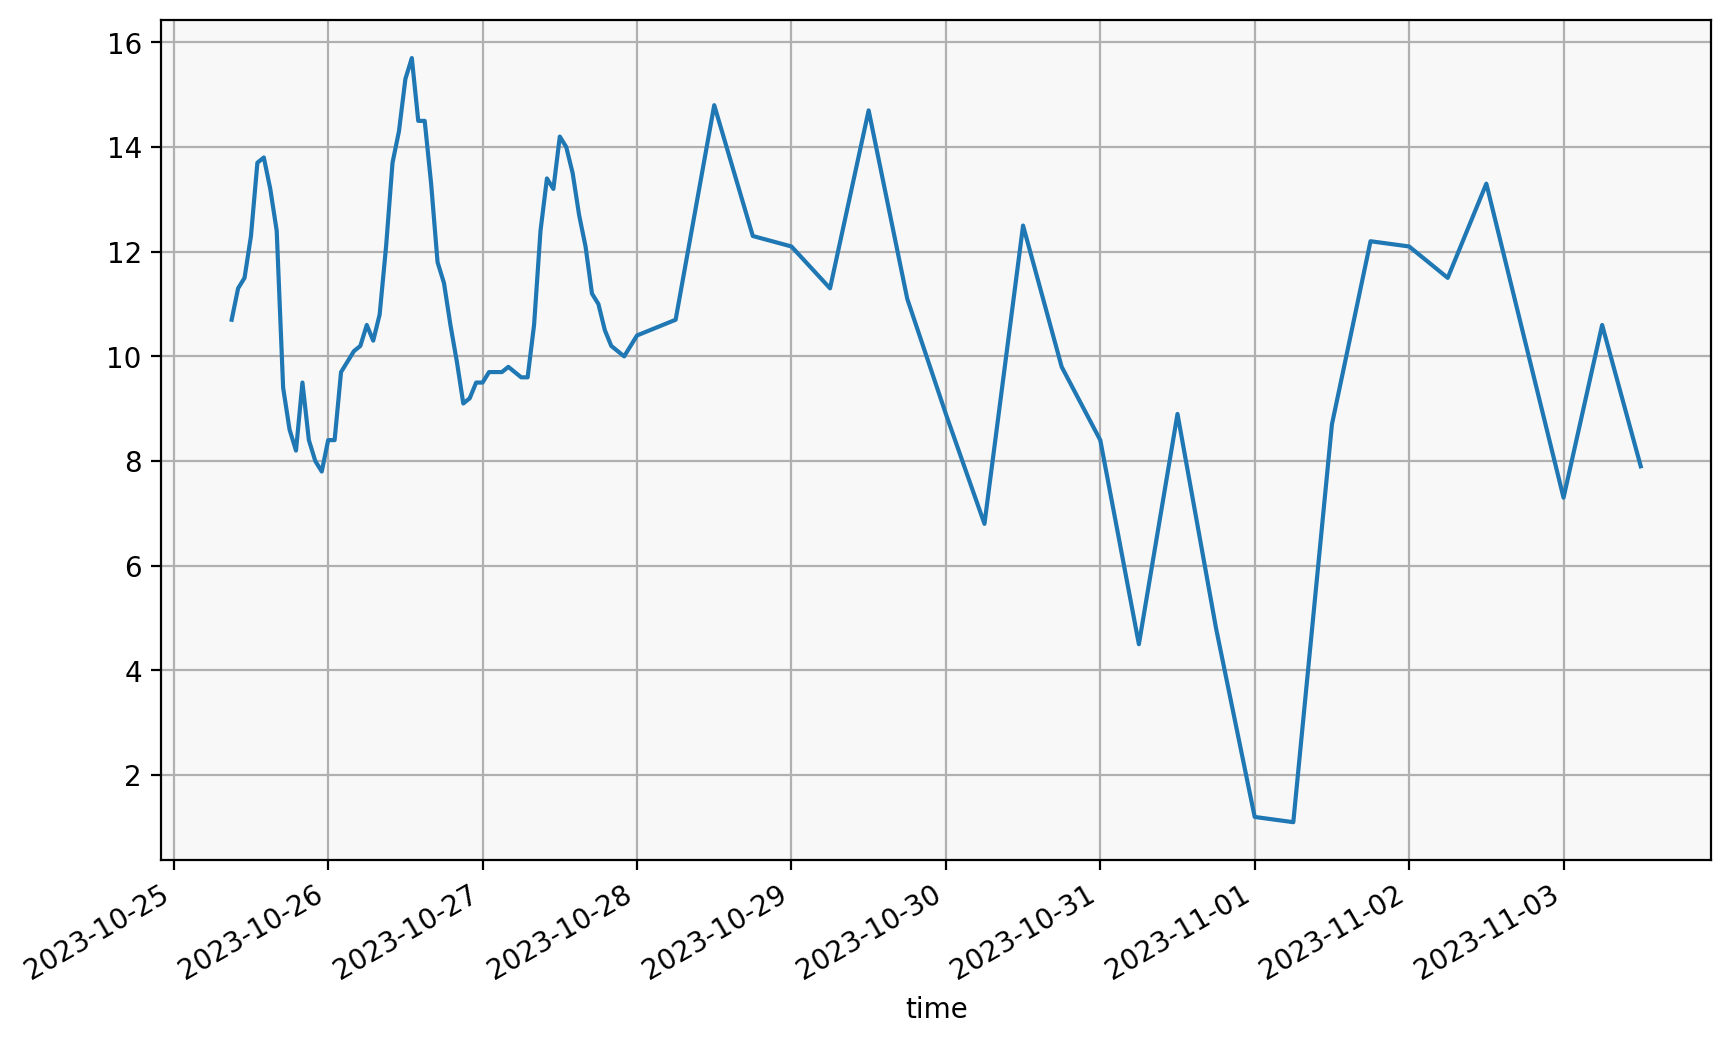

In [26]:
df.air_temperature.plot(grid=True)

<Axes: >

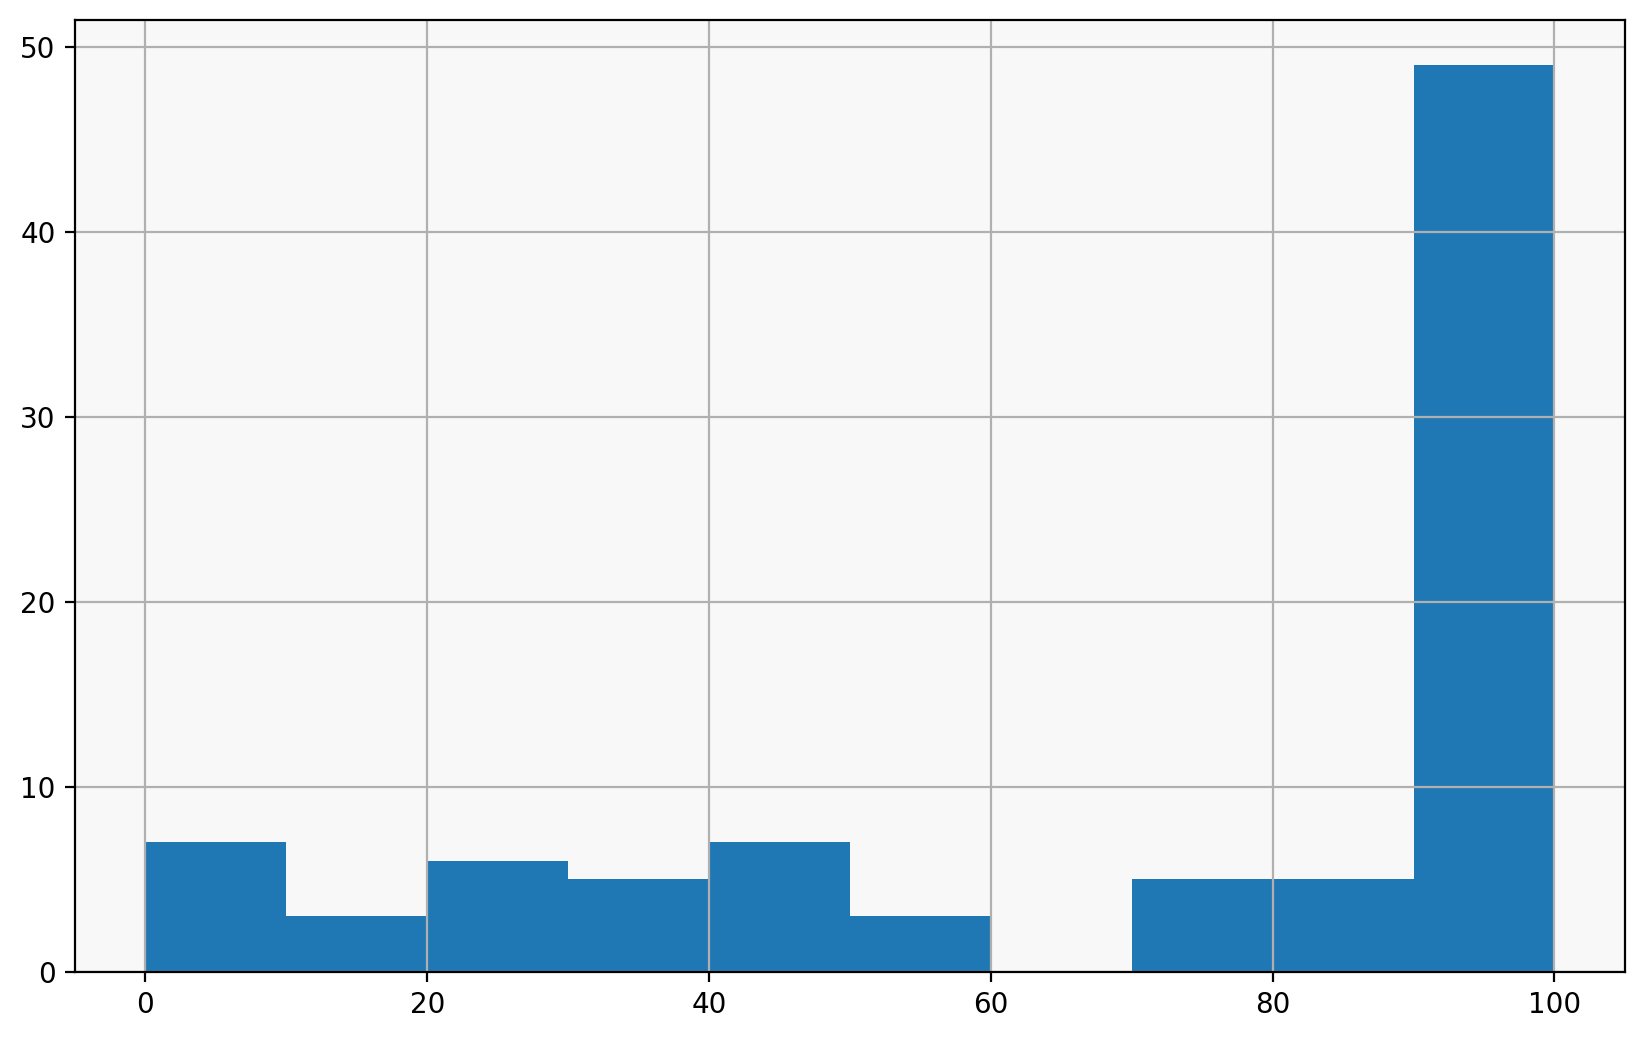

In [27]:
df.cloud_area_fraction.hist()

Another API:

The weather API expects latitude, longitude,
but we have location names.

There's an API for that!

In [28]:
r = requests.get(
    "https://geocode.maps.co/search",
    params={"city": "Bergen", "country": "Norway"},
)
r.json()

[{'place_id': 286402934,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'relation',
  'osm_id': 404159,
  'boundingbox': ['60.1760905', '60.5360925', '5.1445788', '5.6867918'],
  'lat': '60.3943055',
  'lon': '5.3259192',
  'display_name': 'Bergen, Vestland, Norway',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.8412391232119534},
 {'place_id': 62960991,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'node',
  'osm_id': 5638206557,
  'boundingbox': ['59.6009016', '59.6209016', '8.9104283', '8.9304283'],
  'lat': '59.6109016',
  'lon': '8.9204283',
  'display_name': 'Bergen, Hjartdal, Vestfold og Telemark, 3692, Norway',
  'class': 'place',
  'type': 'farm',
  'importance': 0.42}]

Write a function to locate a city, returning latitude, longitude as floats

In [29]:
def locate_city(city: str, country: str = "Norway") -> tuple[float, float]:
    """return (lat, lon) for a city"""
    r = requests.get(
        "https://geocode.maps.co/search",
        params={"city": city, "country": country},
    )

    matches = r.json()
    if len(matches) < 1:
        raise ValueError(f"No match for {city}, {country}")

    location = matches[0]
    return (float(location["lat"]), float(location["lon"]))

In [30]:
locate_city("Oslo")

(59.9133301, 10.7389701)

In [31]:
locate_city("Bergen")

(60.3943055, 5.3259192)

Exercise:

write a function to get the city forcast, given name and country

1. look up lat, lon from name, country
2. get forecast
3. add 'city' column

In [32]:
def city_forecast(city: str, country: str = "Norway") -> pd.DataFrame:
    """Given a city name, return a DataFrame of the weather forecast

    1. resolves gps for city
    2. fetches forecast
    3. tidies data
    4. wraps in DataFrame
    """
    lat, lon = locate_city(city, country)
    url = "https://api.met.no/weatherapi/locationforecast/2.0/compact"
    r = s.get(url, params={"lat": lat, "lon": lon})
    tidy_records = [
        tidy_format(record) for record in r.json()["properties"]["timeseries"]
    ]
    df = pd.DataFrame.from_dict(tidy_records)
    df["time"] = pd.to_datetime(df["time"])
    df["city"] = city
    return df


oslo = city_forecast("Oslo")
oslo

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2023-10-25 09:00:00+00:00,1015.2,2.7,91.2,74.1,46.8,4.7,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0,Oslo
1,2023-10-25 10:00:00+00:00,1015.0,3.5,79.0,71.3,48.5,4.5,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
2,2023-10-25 11:00:00+00:00,1014.2,4.3,68.0,68.1,47.8,4.8,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
3,2023-10-25 12:00:00+00:00,1013.8,5.0,73.0,65.7,52.4,4.8,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
4,2023-10-25 13:00:00+00:00,1013.5,5.3,68.1,64.7,52.7,5.2,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2023-11-03 06:00:00+00:00,1002.4,4.0,100.0,93.2,56.0,4.1,lightrain,NaN,NaN,cloudy,0.0,Oslo
84,2023-11-03 12:00:00+00:00,999.3,3.8,100.0,89.4,57.0,4.6,rain,NaN,NaN,rain,2.7,Oslo
85,2023-11-03 18:00:00+00:00,996.7,5.1,100.0,94.9,61.9,4.4,lightrain,NaN,NaN,rain,2.9,Oslo
86,2023-11-04 00:00:00+00:00,995.8,4.4,100.0,95.2,54.7,4.1,NaN,NaN,NaN,cloudy,0.0,Oslo


In [33]:
forecasts = pd.concat(
    city_forecast(city) for city in ("Oslo", "Bergen", " Tromsø", "Trondheim")
)
forecasts

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2023-10-25 09:00:00+00:00,1015.2,2.7,91.2,74.1,46.8,4.7,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0,Oslo
1,2023-10-25 10:00:00+00:00,1015.0,3.5,79.0,71.3,48.5,4.5,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
2,2023-10-25 11:00:00+00:00,1014.2,4.3,68.0,68.1,47.8,4.8,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
3,2023-10-25 12:00:00+00:00,1013.8,5.0,73.0,65.7,52.4,4.8,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
4,2023-10-25 13:00:00+00:00,1013.5,5.3,68.1,64.7,52.7,5.2,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2023-11-03 06:00:00+00:00,1001.9,3.6,100.0,70.9,128.2,4.2,cloudy,NaN,NaN,cloudy,0.0,Trondheim
84,2023-11-03 12:00:00+00:00,994.9,5.6,98.8,67.3,116.6,4.2,cloudy,NaN,NaN,cloudy,0.0,Trondheim
85,2023-11-03 18:00:00+00:00,997.6,4.5,95.7,74.1,129.1,4.2,cloudy,NaN,NaN,cloudy,0.0,Trondheim
86,2023-11-04 00:00:00+00:00,995.8,4.3,100.0,74.1,135.3,4.1,NaN,NaN,NaN,cloudy,0.0,Trondheim


In [34]:
forecasts.groupby(["time", "city"])

In [35]:
forecasts.groupby(["time", "city"]).air_temperature

In [36]:
forecasts.groupby(["time", "city"]).air_temperature.first()

time                       city     
2023-10-25 09:00:00+00:00   Tromsø      -0.7
                           Bergen       10.7
                           Oslo          2.7
                           Trondheim     2.1
2023-10-25 10:00:00+00:00   Tromsø       0.5
                                        ... 
2023-11-04 00:00:00+00:00  Trondheim     4.3
2023-11-04 06:00:00+00:00   Tromsø      -0.9
                           Bergen        6.3
                           Oslo          4.2
                           Trondheim     3.8
Name: air_temperature, Length: 352, dtype: float64

In [37]:
forecasts.groupby(["time", "city"]).air_temperature.first().unstack()

city,Tromsø,Bergen,Oslo,Trondheim
time,,,,
2023-10-25 09:00:00+00:00,-0.7,10.7,2.7,2.1
2023-10-25 10:00:00+00:00,0.5,11.6,3.5,3.5
2023-10-25 11:00:00+00:00,1.4,12.4,4.3,4.9
2023-10-25 12:00:00+00:00,1.7,13.2,5.0,5.9
2023-10-25 13:00:00+00:00,1.7,13.5,5.3,6.3
...,...,...,...,...
2023-11-03 06:00:00+00:00,-0.6,6.0,4.0,3.6
2023-11-03 12:00:00+00:00,0.8,8.3,3.8,5.6
2023-11-03 18:00:00+00:00,-0.5,6.8,5.1,4.5


<Axes: xlabel='time'>

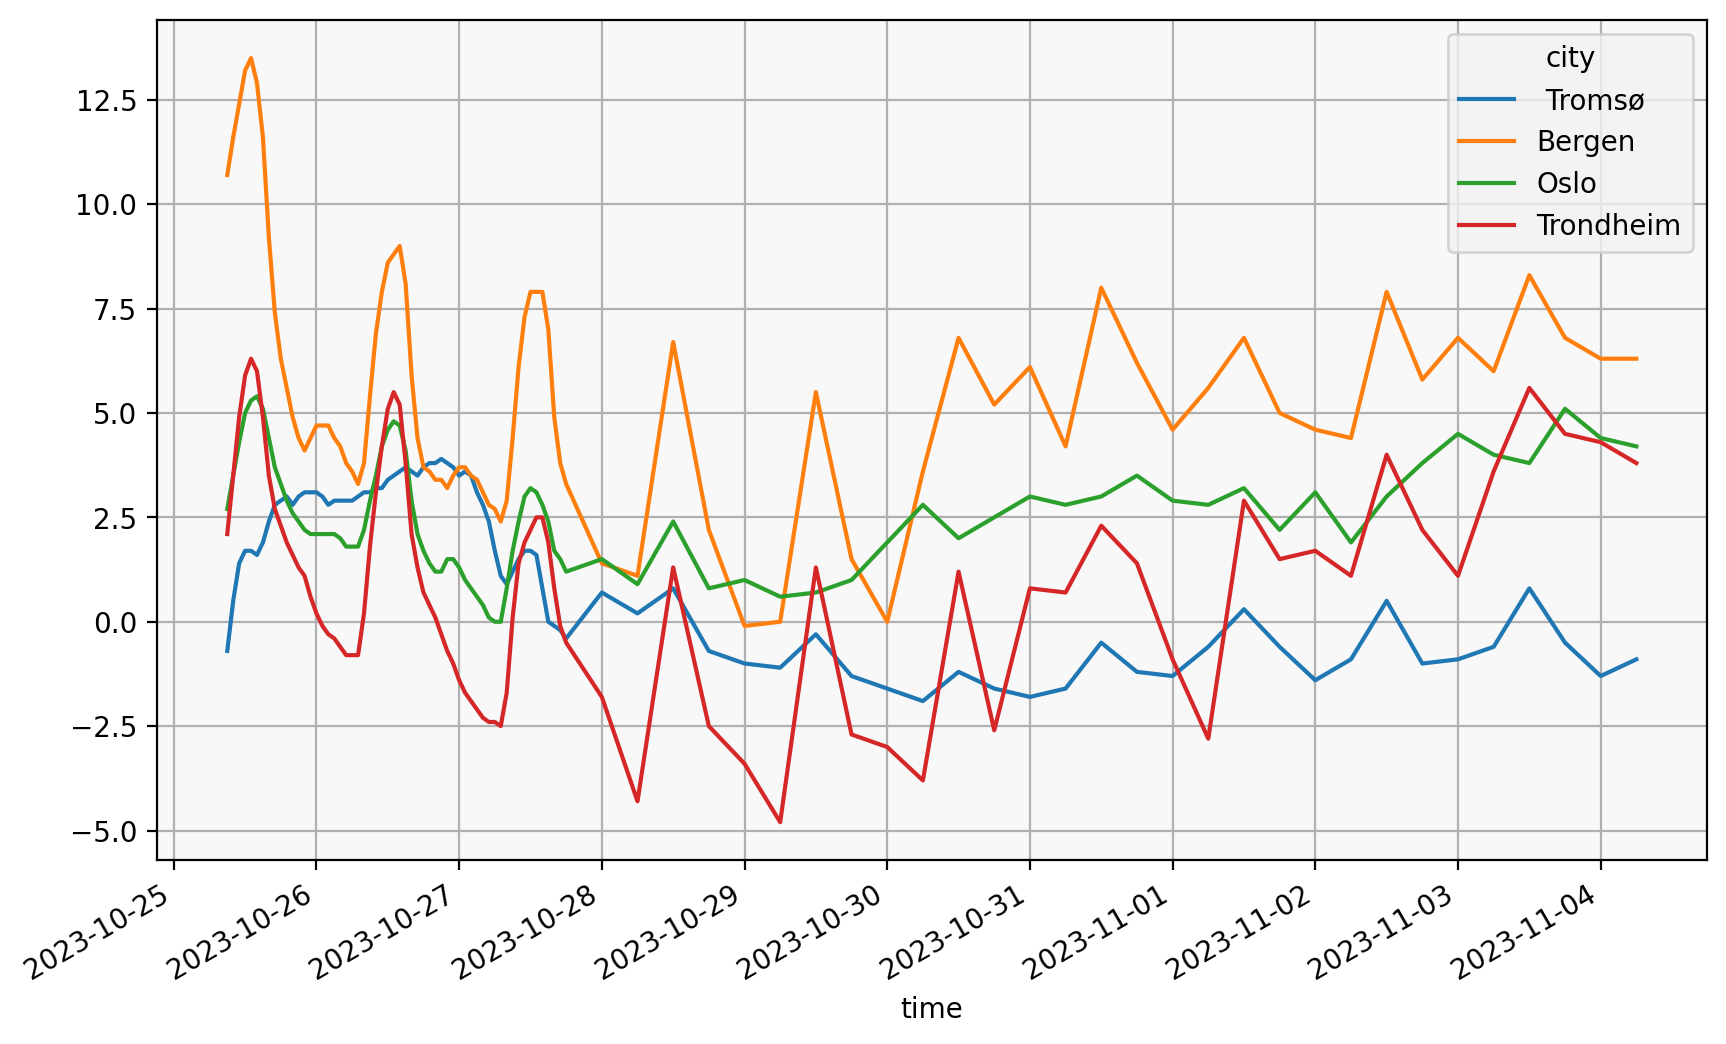

In [38]:
forecasts.groupby(["time", "city"]).air_temperature.first().unstack().plot()

<Axes: xlabel='time'>

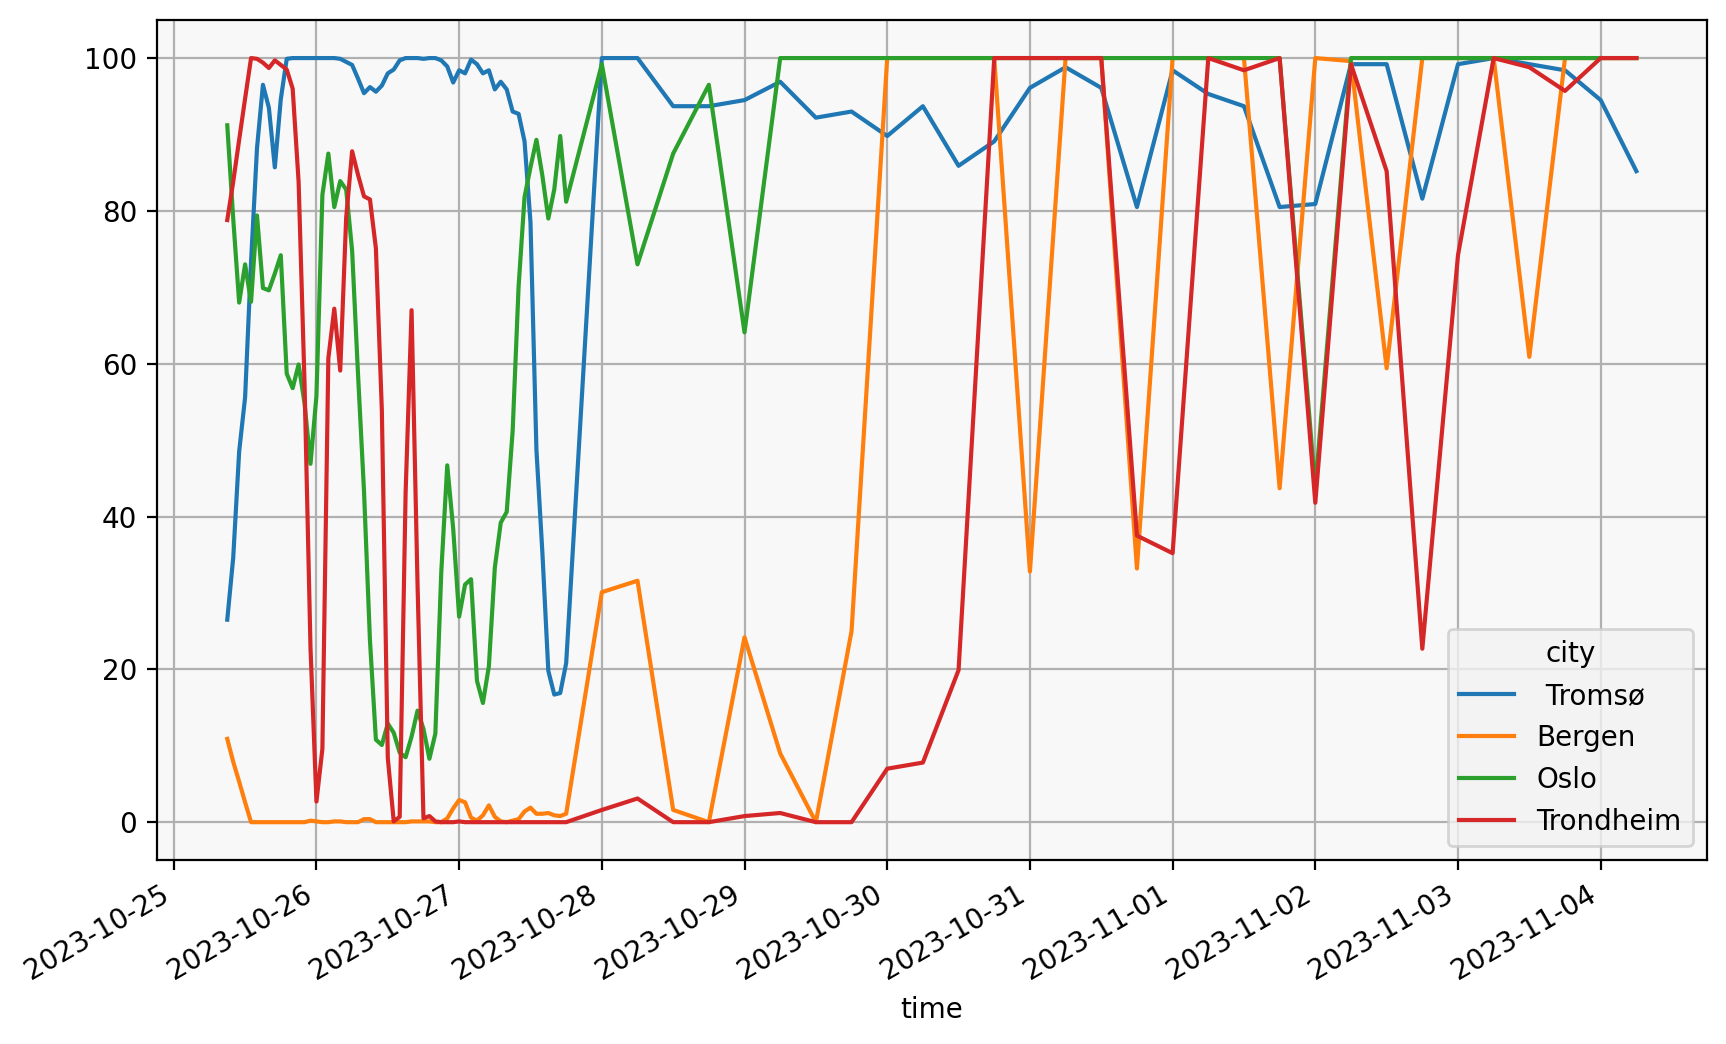

In [39]:
forecasts.groupby(["time", "city"]).cloud_area_fraction.first().unstack().plot()

<Axes: xlabel='next_1_hours_symbol_code'>

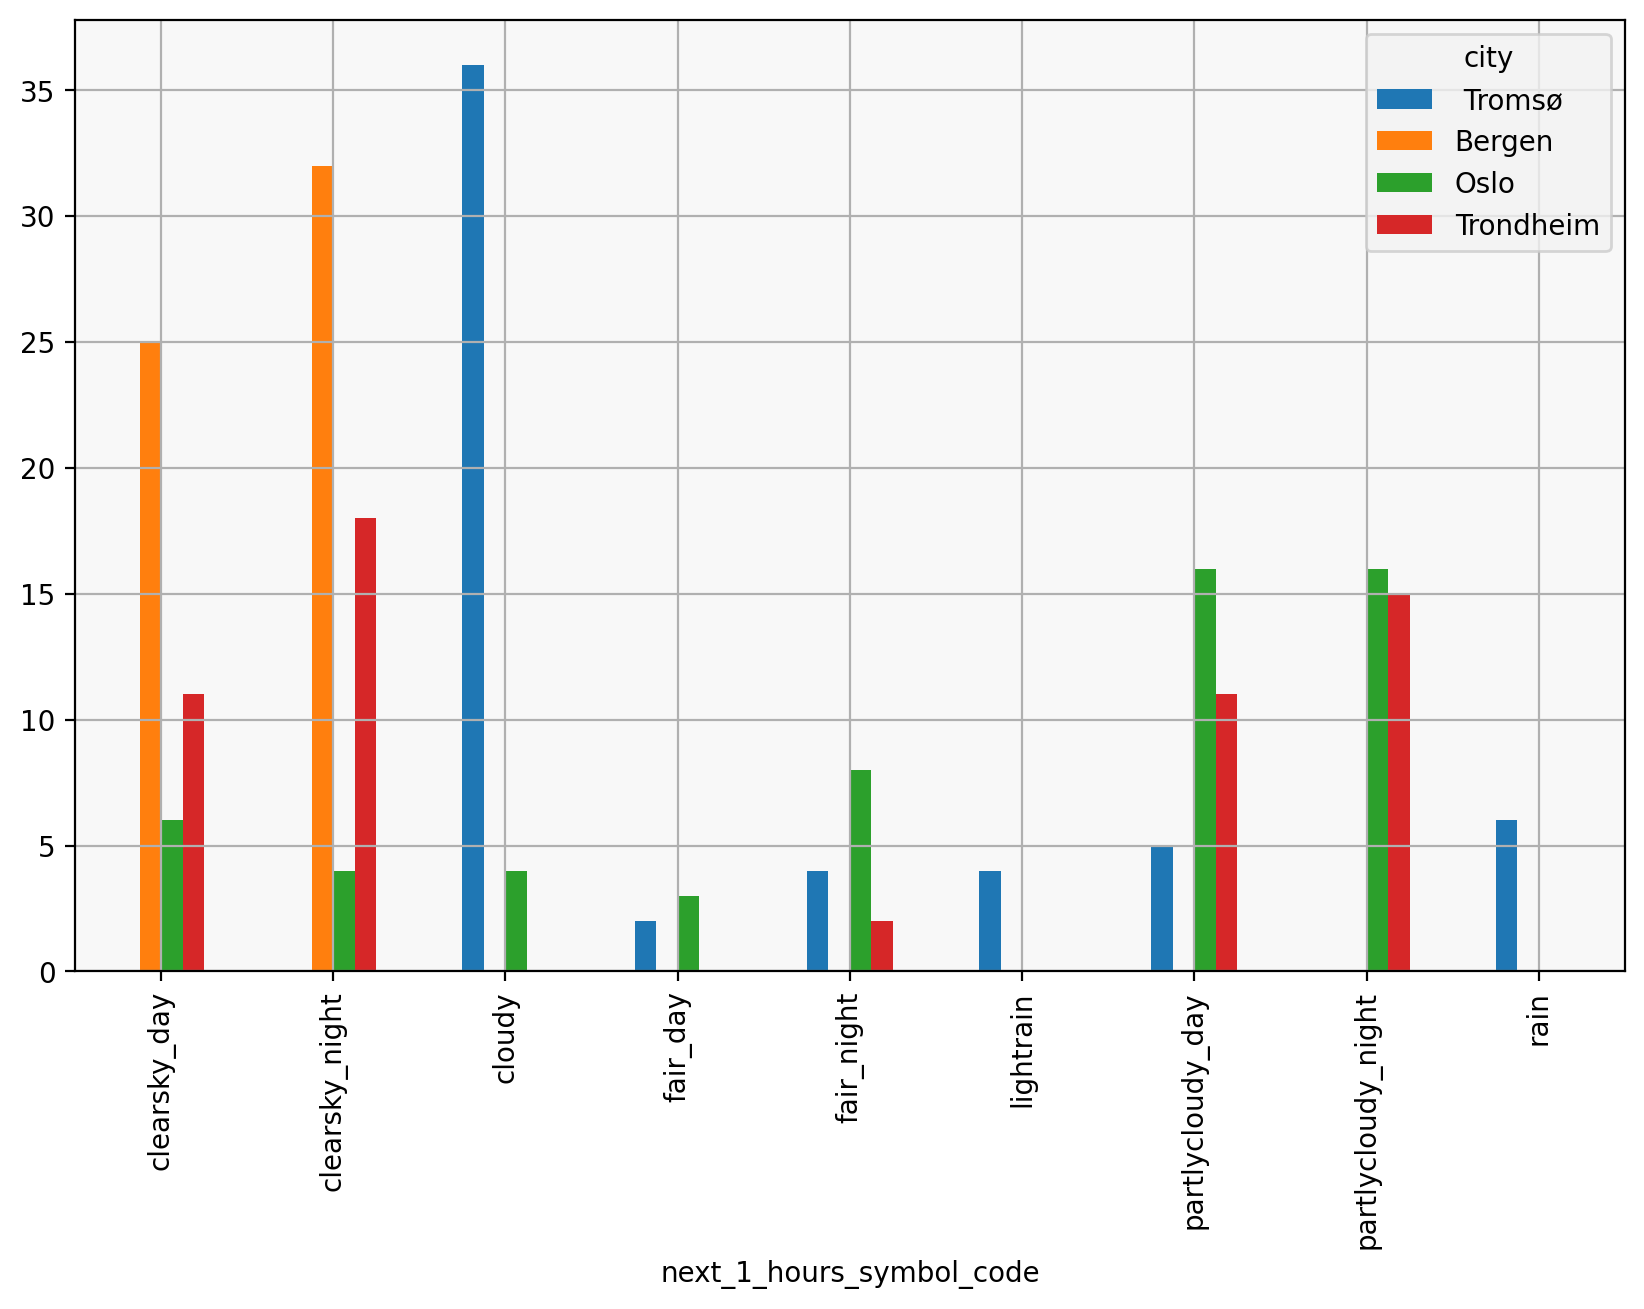

In [40]:
forecasts.groupby(
    ["next_1_hours_symbol_code", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

I don't really care about day/night. How do we remove that?

In [41]:
forecasts["next_1_hours_symbol_code"].value_counts()

next_1_hours_symbol_code
clearsky_night        54
clearsky_day          42
cloudy                40
partlycloudy_day      32
partlycloudy_night    31
fair_night            14
rain                   6
fair_day               5
lightrain              4
Name: count, dtype: int64

In [42]:
forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True).value_counts()

0             1    
clearsky      night    54
              day      42
partlycloudy  day      32
              night    31
fair          night    14
              day       5
Name: count, dtype: int64

In [43]:
forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True)

,0,1
0,cloudy,None
1,partlycloudy,day
2,partlycloudy,day
3,partlycloudy,day
4,partlycloudy,day
...,...,...
83,NaN,NaN
84,NaN,NaN
85,NaN,NaN
86,NaN,NaN


In [44]:
for n in (1, 6, 12):
    forecasts[f"next_{n}_hours_symbol_code_clean"] = forecasts[
        f"next_{n}_hours_symbol_code"
    ].str.split("_", n=1, expand=True)[0]

<Axes: xlabel='next_1_hours_symbol_code_clean'>

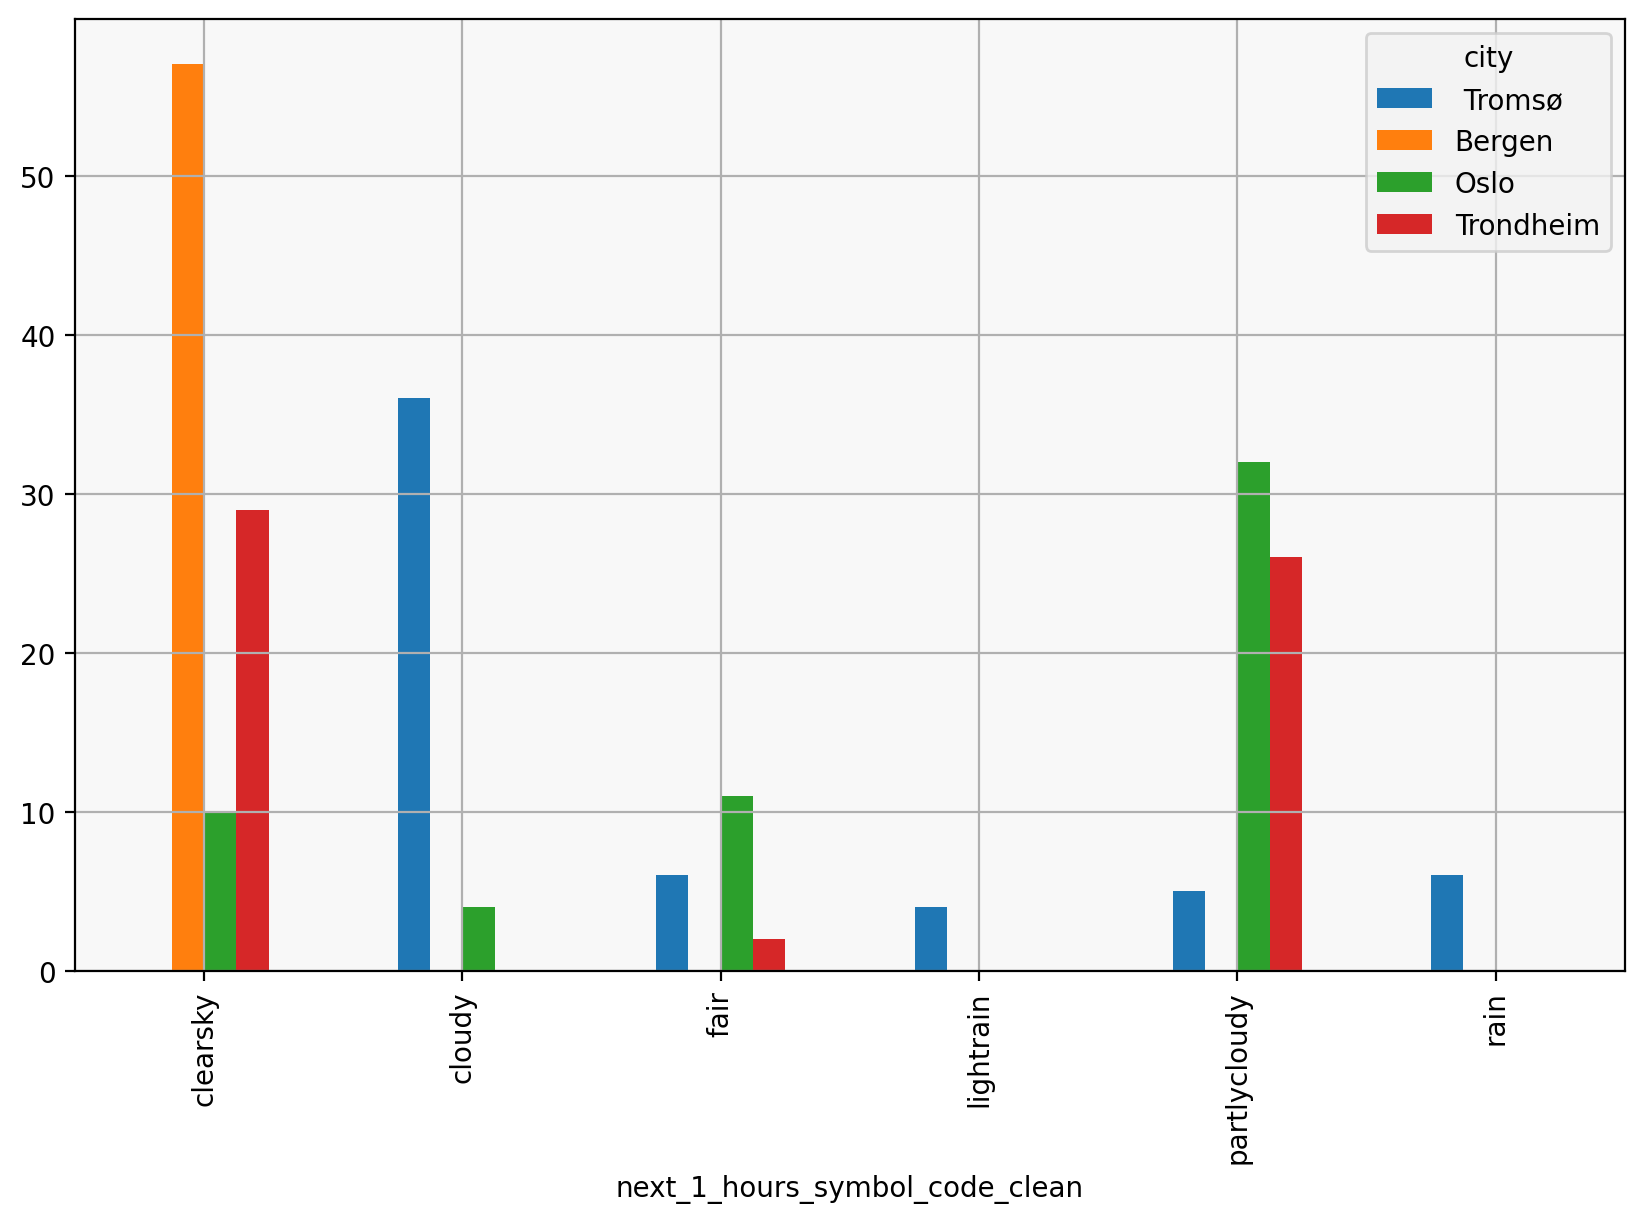

In [45]:
forecasts.groupby(
    ["next_1_hours_symbol_code_clean", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<Axes: xlabel='next_6_hours_symbol_code_clean'>

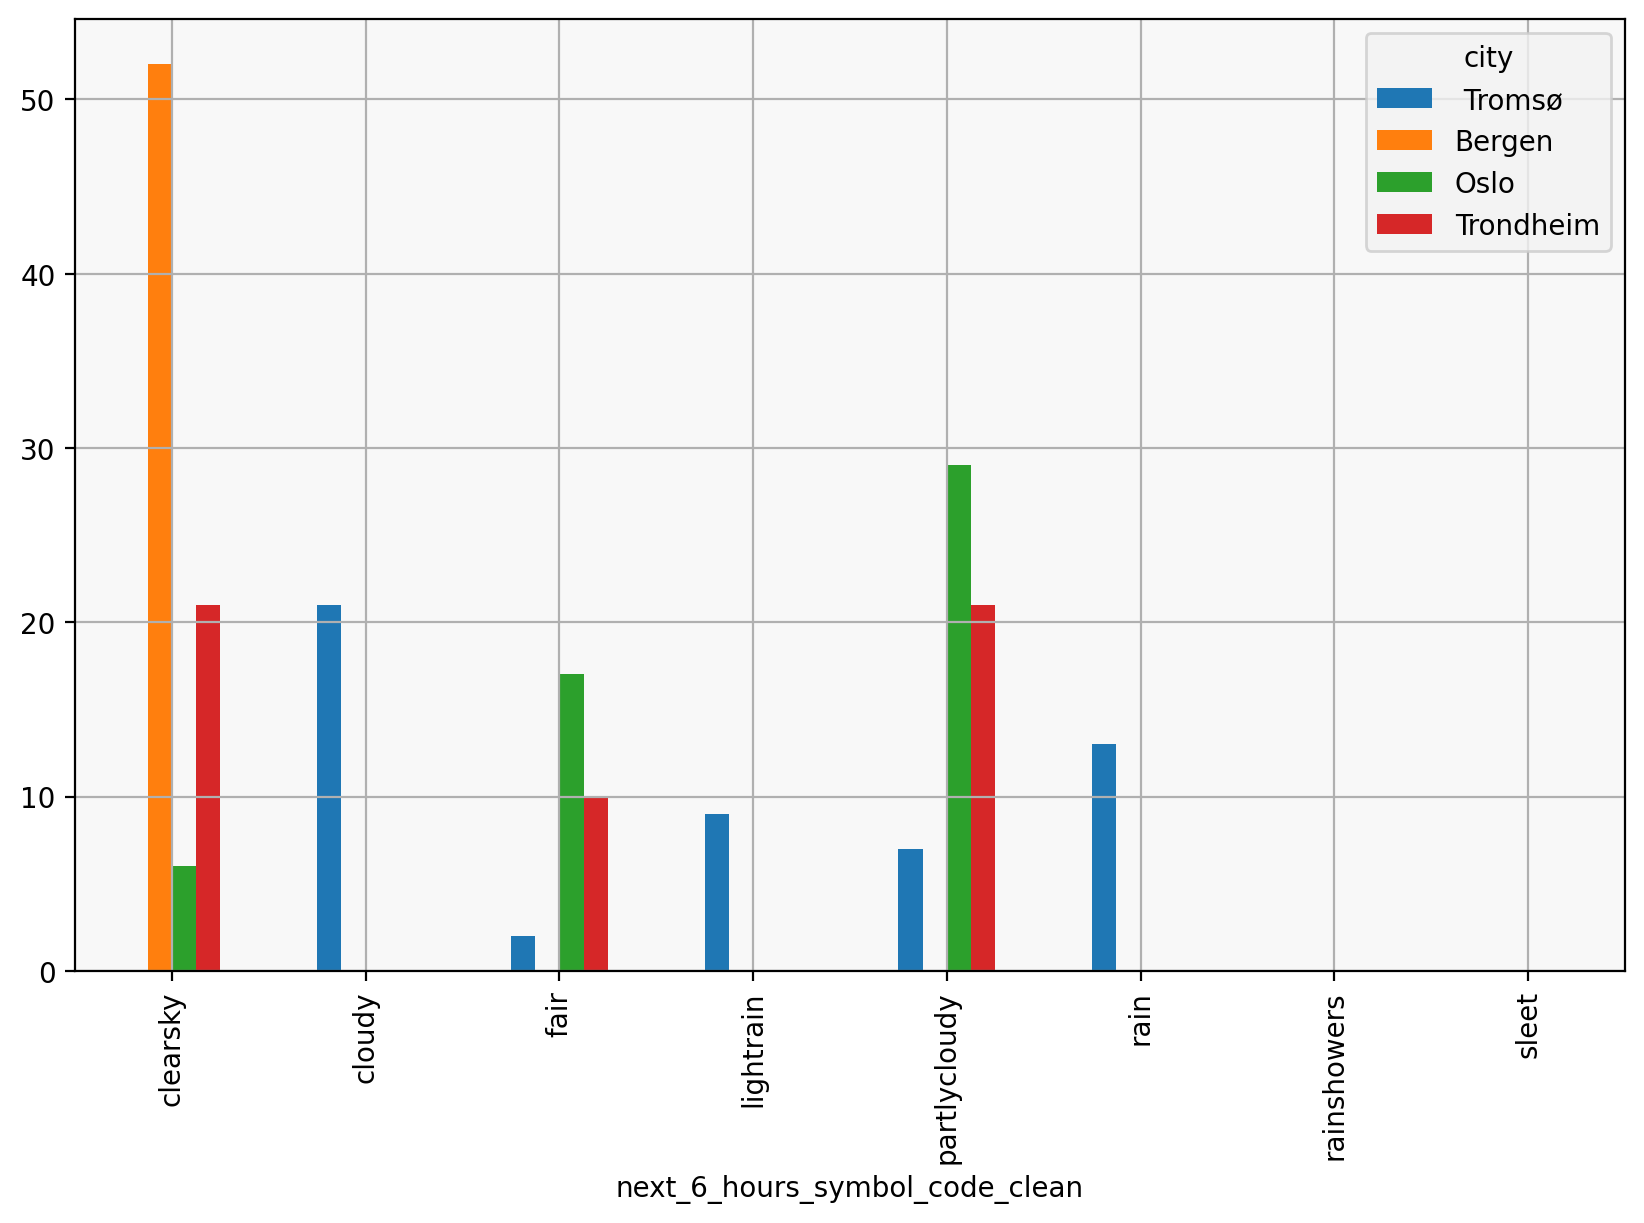

In [46]:
forecasts.groupby(
    ["next_6_hours_symbol_code_clean", "city"]
).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<Axes: xlabel='time'>

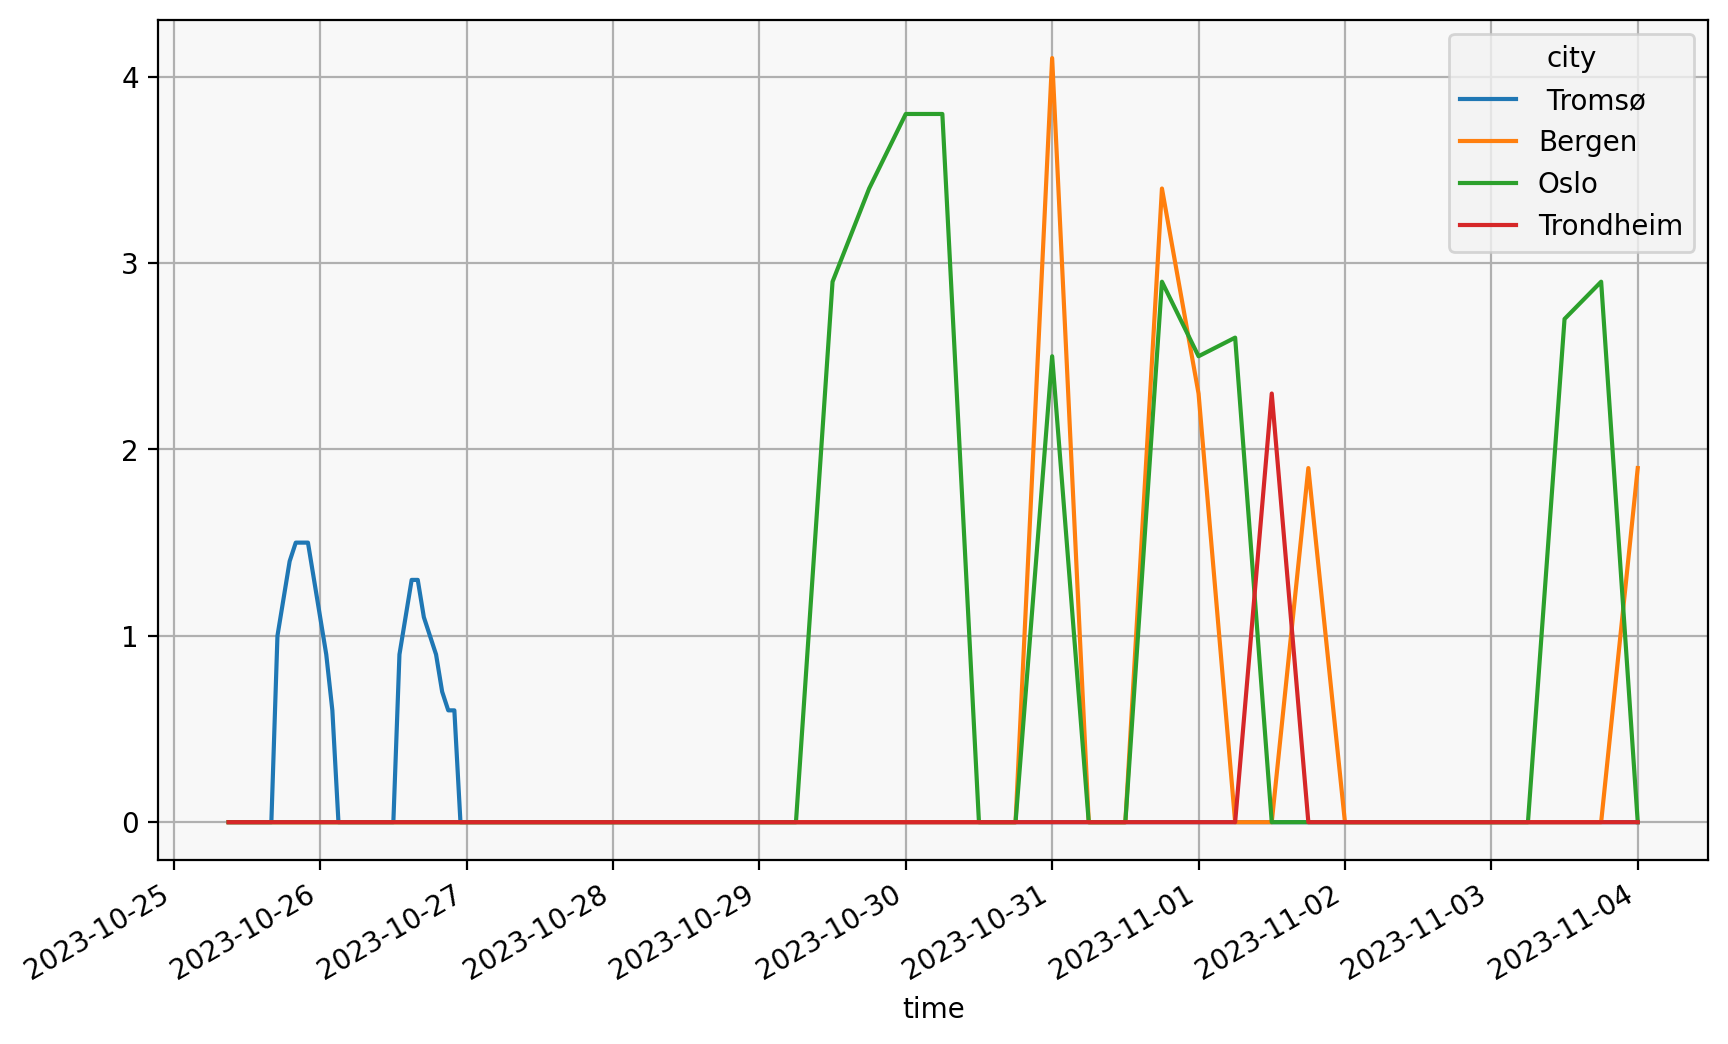

In [47]:
forecasts.groupby(
    ["time", "city"]
).next_6_hours_precipitation_amount.first().unstack().dropna().plot()